##  **Clone the  YOLOv10 Github Repository**

https://github.com/THU-MIG/yolov10

https://medium.com/@batuhansenerr/yolov10-custom-object-detection-bd7298ddbfd3

In [1]:
!pip install -q git+https://github.com/THU-MIG/yolov10.git
!pip install -q roboflow

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.7 MB/s eta 0:00:00


## **Download YOLOv10 pre-trained weights**

In [4]:
import IPython
import sys

def clean_notebook():
    IPython.display.clear_output(wait=True)
    print("Notebook cleaned.")

!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10n.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10s.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10m.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10b.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10x.pt
!wget -P weights https://github.com/jameslahm/yolov10/releases/download/v1.0/yolov10l.pt

# Clean up the notebook
clean_notebook()




Notebook cleaned.


## **Download dataset from Roboflow Universe**

In [3]:
from roboflow import Roboflow
rf = Roboflow(api_key="FgeehcxWkzz94oos3m3L")
project = rf.workspace("rehman-2vlay").project("fire-detection-vdtmc")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.34, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Fire-Detection-1 in yolov8:: 100%|██████████| 1514/1514 [00:00<00:00, 7384.17it/s]


## **Custom Training**

In [5]:
!yolo task=detect mode=train epochs=30 batch=32 plots=True \
model='/content/weights/yolov10n.pt' \
data='/content/Fire-Detection-1/data.yaml'

New https://pypi.org/project/ultralytics/8.2.23 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=/content/weights/yolov10n.pt, data=/content/Fire-Detection-1/data.yaml, epochs=30, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_ma

#**Display the confusion matrix and Results**

In [7]:
from IPython.display import Image
from ultralytics import YOLOv10

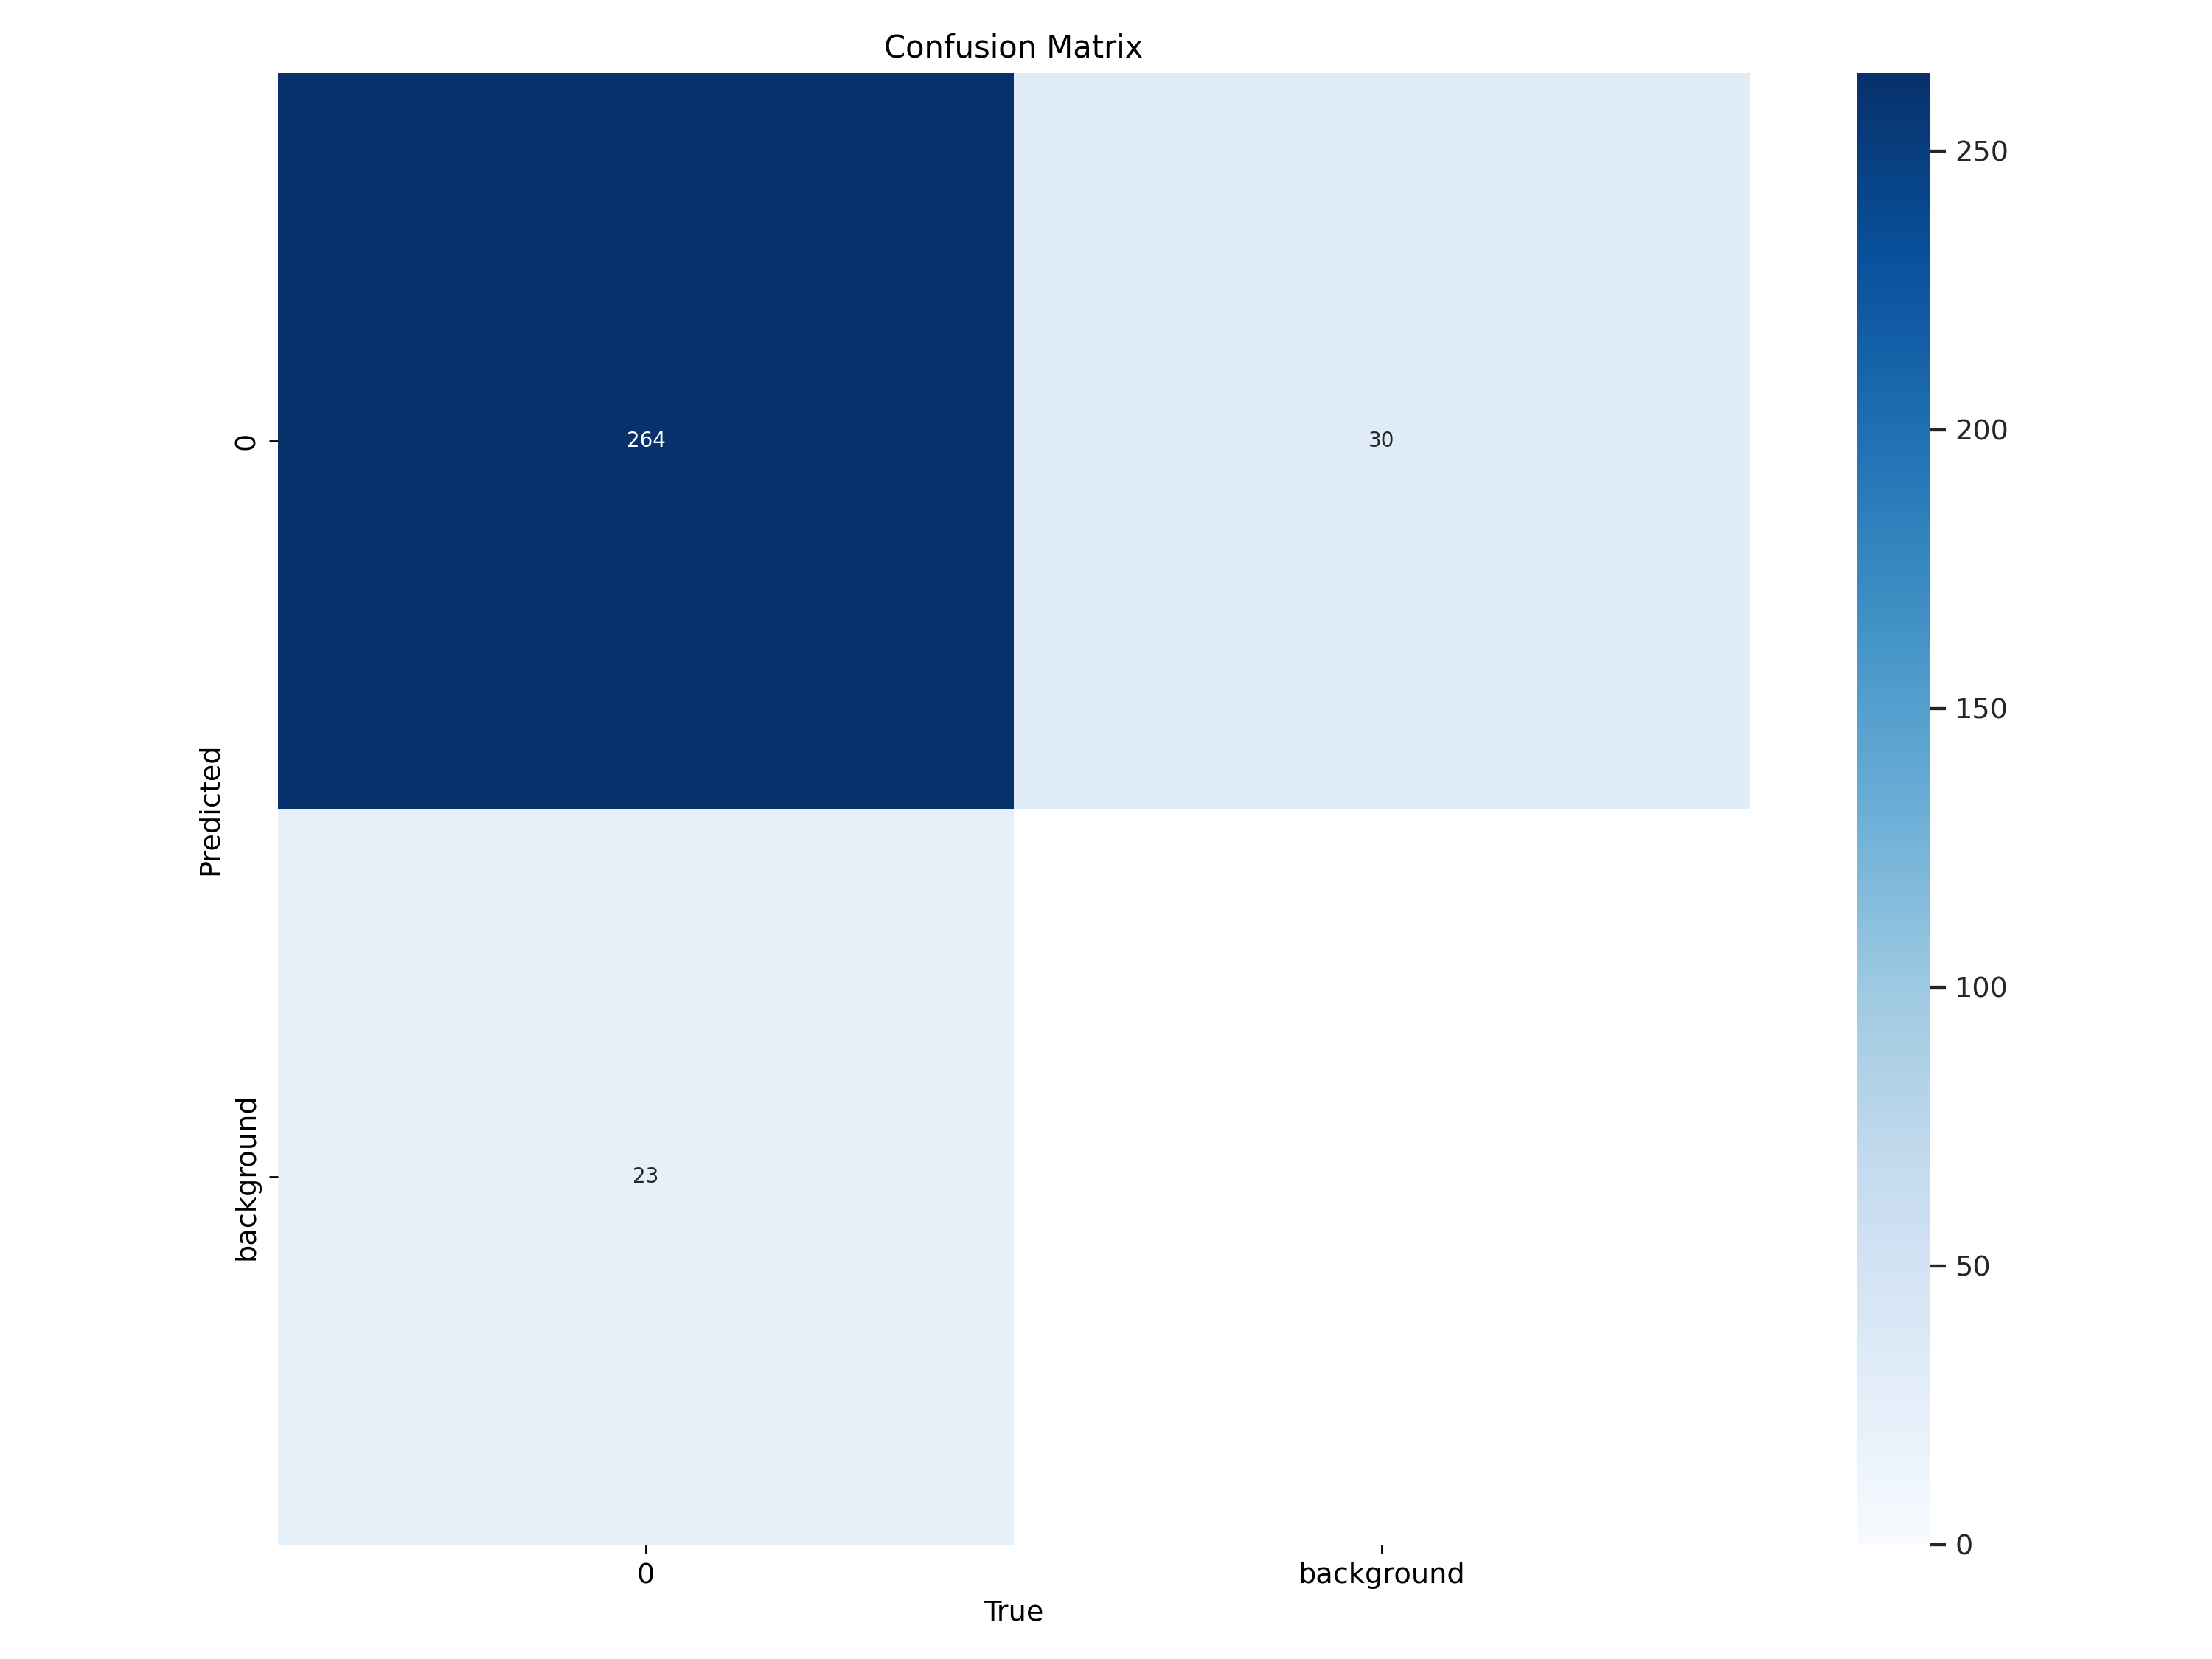

In [8]:
Image(filename='/content/runs/detect/train/confusion_matrix.png', width=600)

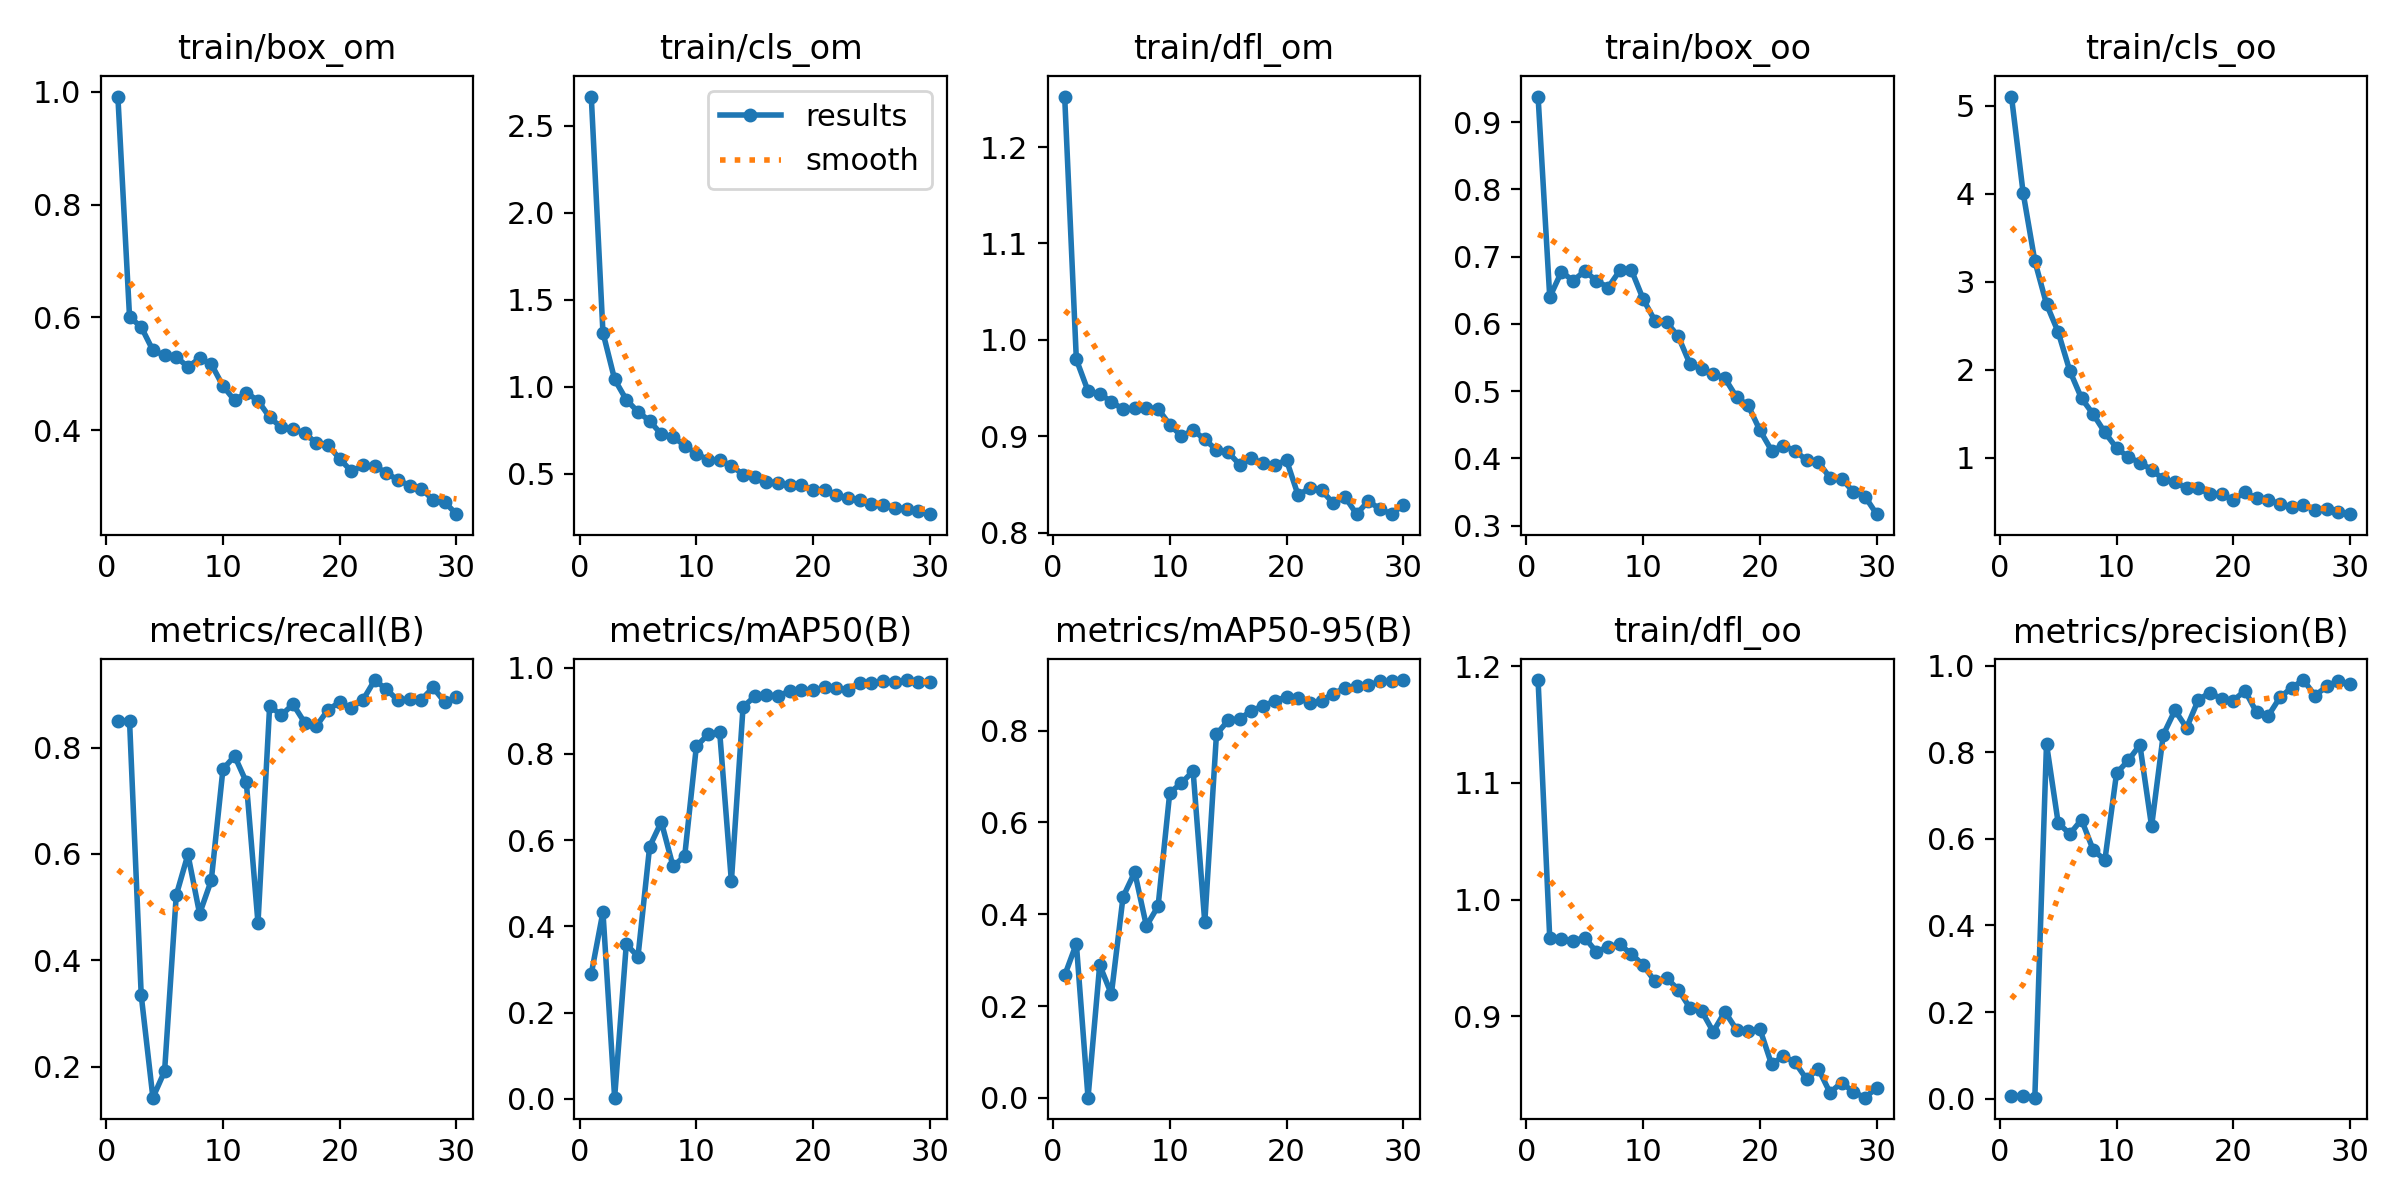

In [9]:
Image(filename='/content/runs/detect/train/results.png', width=600)

# **Testing the Trained Model**

In [10]:
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='/content/Fire-Detection-1/test/images', conf=0.25,save=True)



image 1/77 /content/Fire-Detection-1/test/images/large_-1052-_jpg.rf.5e87fdb7cf79d7b9fe38a662f0edfce1.jpg: 640x640 3 0s, 10.9ms
image 2/77 /content/Fire-Detection-1/test/images/large_-1189-_jpg.rf.29f5c9be9e563bdd1eaba27e93392b8f.jpg: 640x640 1 0, 12.6ms
image 3/77 /content/Fire-Detection-1/test/images/large_-1194-_jpg.rf.1ceb7a90b4aa9e5ea3d50f7a9eb1ede1.jpg: 640x640 2 0s, 10.7ms
image 4/77 /content/Fire-Detection-1/test/images/large_-1324-_jpg.rf.39c6dd2653ebb9e519c6f65b0e35fc27.jpg: 640x640 1 0, 10.6ms
image 5/77 /content/Fire-Detection-1/test/images/large_-1399-_jpg.rf.fc0d34273b4f8258ba93f2d5d70f270c.jpg: 640x640 4 0s, 10.4ms
image 6/77 /content/Fire-Detection-1/test/images/large_-1510-_jpg.rf.a6bfaed4330373880c0bf337ec92d138.jpg: 640x640 1 0, 10.5ms
image 7/77 /content/Fire-Detection-1/test/images/large_-1654-_jpg.rf.b7273711304929e9be921d92e0c9c5d9.jpg: 640x640 2 0s, 10.4ms
image 8/77 /content/Fire-Detection-1/test/images/large_-1659-_jpg.rf.eaad6ee3b632cc5282bb00292011c7ba.jpg:

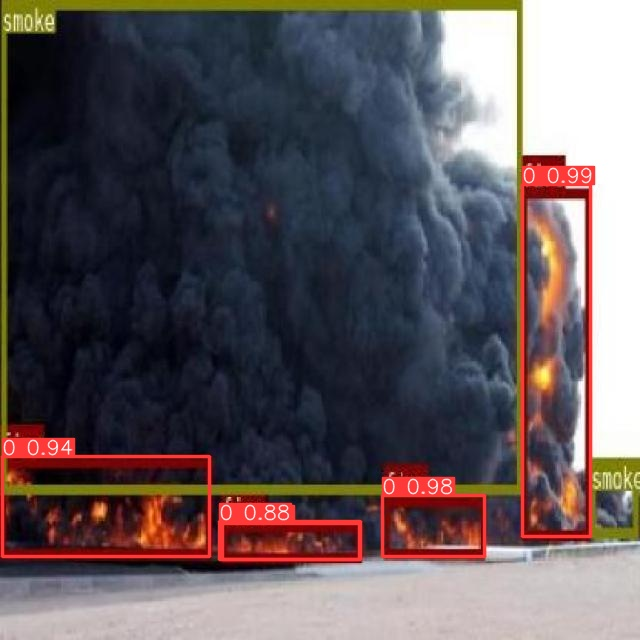

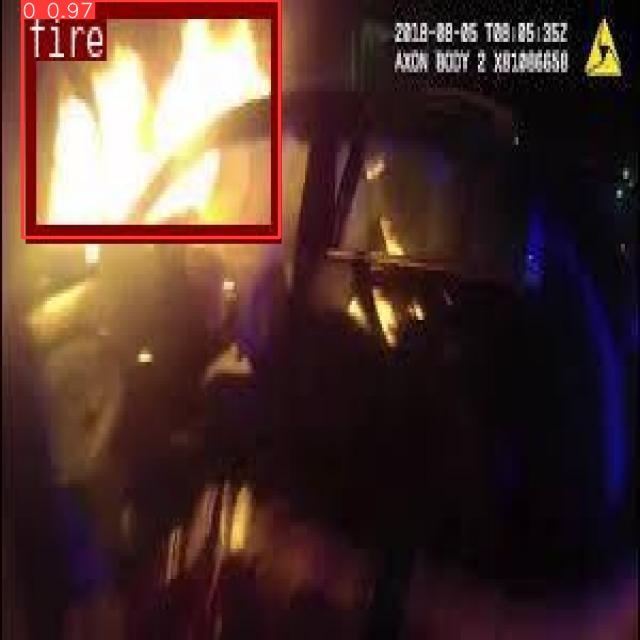

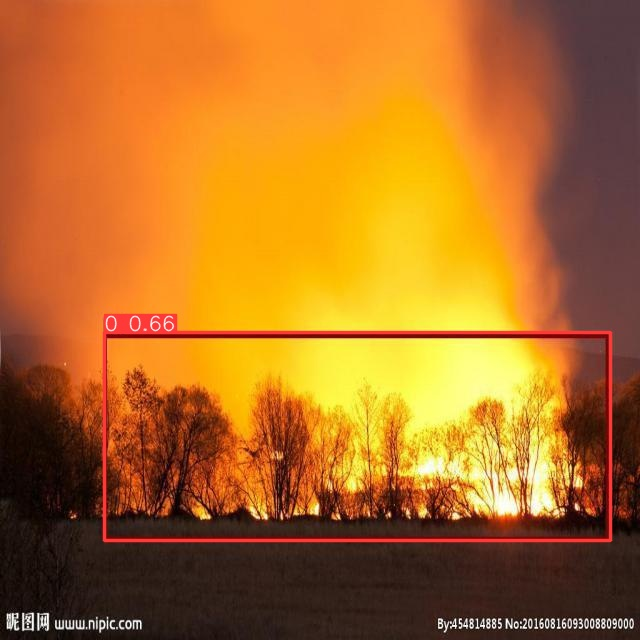

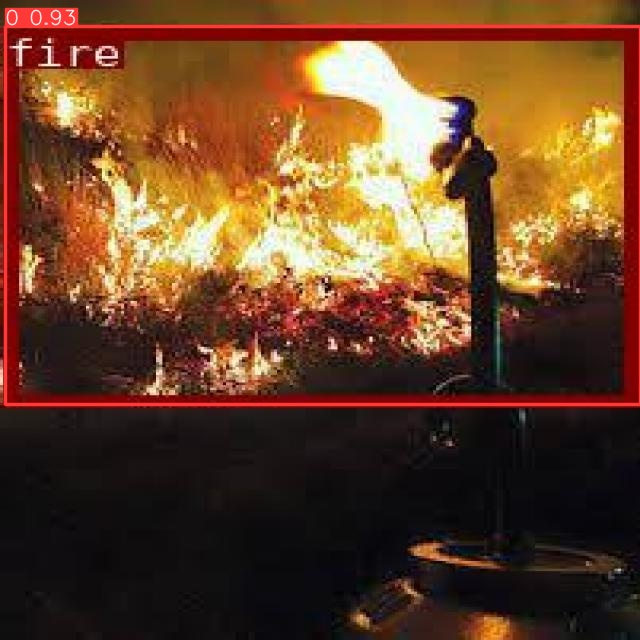

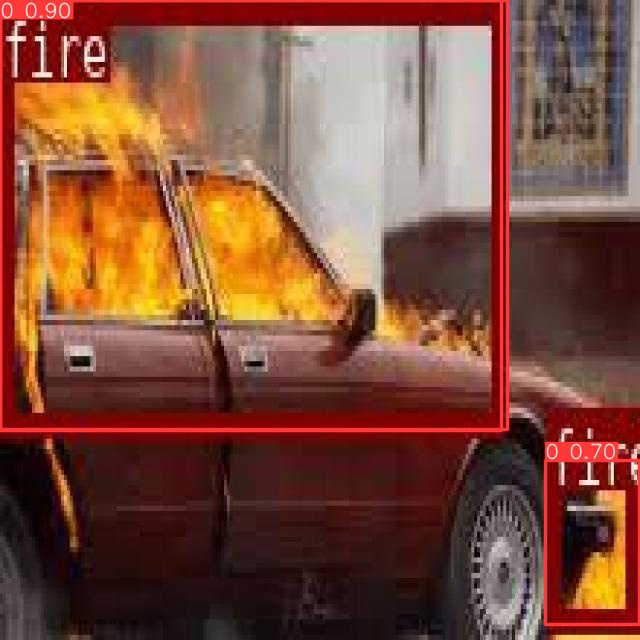

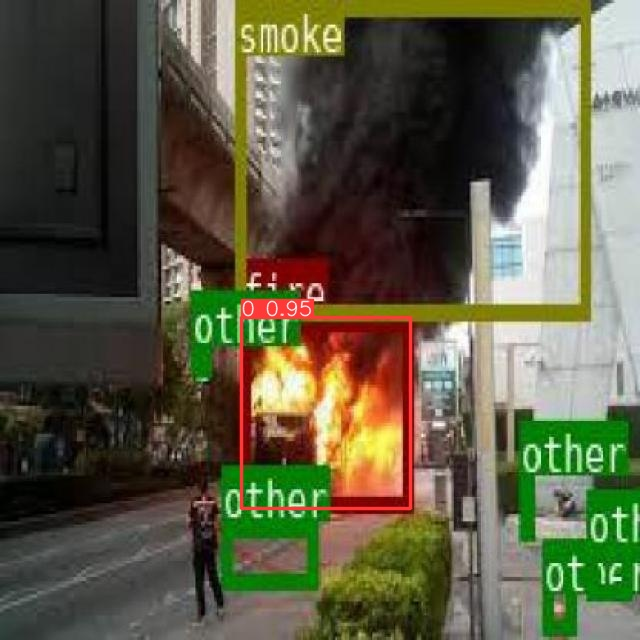

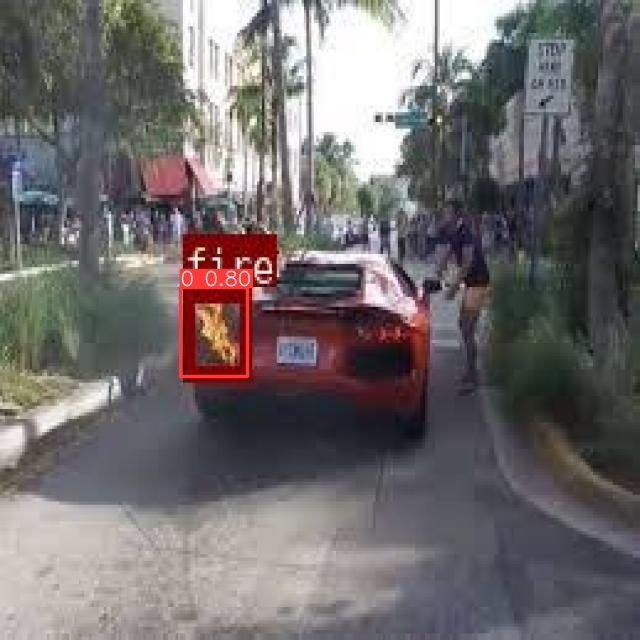

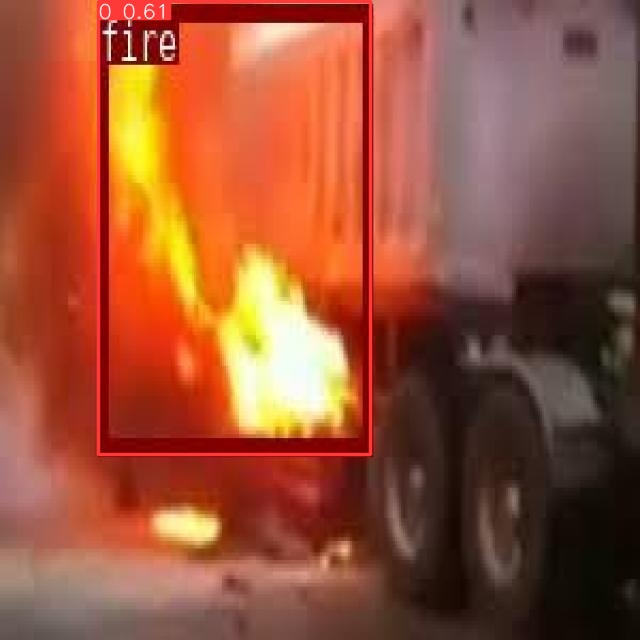

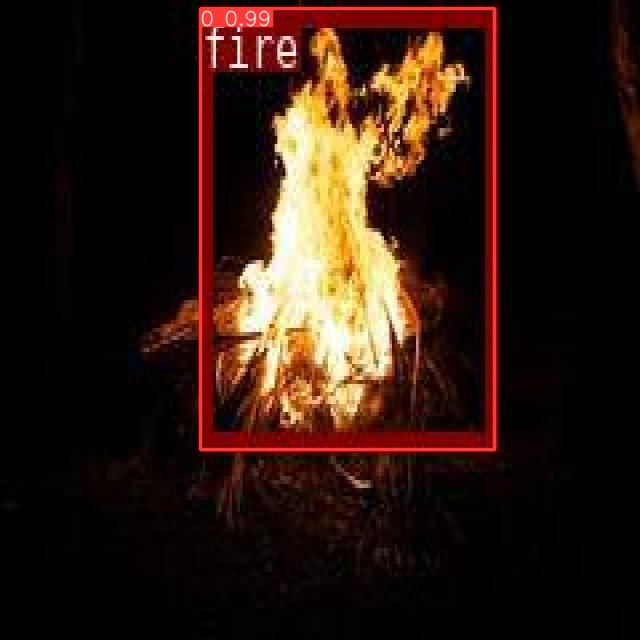

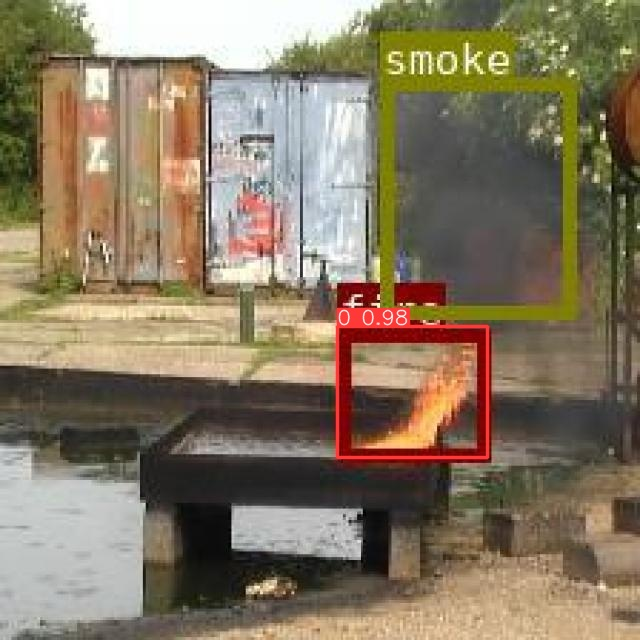

In [12]:
import glob
images = glob.glob('/content/runs/detect/predict/*.jpg')
for image in images[0:10]:
  display(Image(filename = image,width=400))

# **Testing on a video file**

In [ ]:
model_path = '/content/runs/detect/train/weights/best.pt'
model = YOLOv10(model_path)
results = model(source='name of your video file here', conf=0.25,save=True)